### Student Information
Name:崔敏慧

Student ID: 108065516

GitHub ID: tsumin99

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

# Part1_Take Home Exercises


In [1]:
# Import Libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import nltk

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [3]:
# convert data into pandas dataframe
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [4]:
# Trying loc
X.loc[:, 'text':'category_name'][0:6]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian

In [5]:
# Trying loc _ selection by callable 
X.loc[:, lambda df: ['text', 'category']][0:4]

text  category
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3

In [6]:
# Trying iloc _ select via integer list
X.iloc[[1, 5], [1, 2]]

category           category_name
1         1           comp.graphics
5         3  soc.religion.christian

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Answer here:

As I discovered, the record 2,3,5 are considered 'False' as we used .isnull() function, that is, the record 2,3,5 are not considered 'Null' which their 'missing_example' were all inserted as Strings type.

In other words, the .isnull() function didn't take the strings content-'NaN' and 'None' as null. After visiting the Panda documentation, only the "Python None value" and "np.nan" were considered null.  

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
X_sample = X.sample(n=1000) #random state
X_sample[0:6]

text  category  \
502   From: rob@rjck.UUCP (Robert J.C. Kyanko) Subje...         1   
591   From: jim.zisfein@factory.com (Jim Zisfein)  S...         2   
186   From: jonas-y@isy.liu.se (Jonas Yngvesson) Sub...         1   
1736  From: newmme@helios.tn.cornell.edu (Mark E. J....         1   
1815  From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1126  From: gerhard@vmars.tuwien.ac.at (Gerhard Fohl...         3   

               category_name  
502            comp.graphics  
591                  sci.med  
186            comp.graphics  
1736           comp.graphics  
1815             alt.atheism  
1126  soc.religion.christian

**Answer Here:

  At the very beginning, the 'X' contains the raw text from the database.
  In the process, we **generated three columns- 'text', 'category', and 'category_name'** to make it more friendly to our observations. 
  We also **added dummy null values to the 'X' and learned to drop it and to discover the detection of isnull() function.** 
  What's more, we **added duplicated data to 'X' and then dropped them from 'X'**.
  In this step, we **sampled 1000 records from the original X as X_sample, and in the dataframe, we could see that the data is in random order, which is a demonstration of data sampling**.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


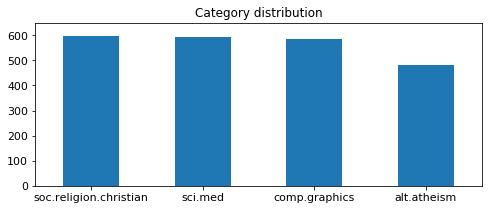

In [10]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))


In [11]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample


sci.med                   280
comp.graphics             256
soc.religion.christian    242
alt.atheism               222
Name: category_name, dtype: int64


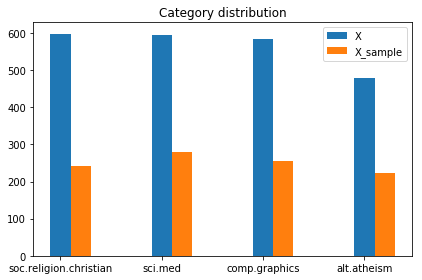

In [12]:
#To make the series fixed and the data will be correct regarding the index name.
ori = [X.category_name.value_counts()['soc.religion.christian'],
       X.category_name.value_counts()['sci.med'],
       X.category_name.value_counts()['comp.graphics'],
       X.category_name.value_counts()['alt.atheism']]

sample = [X_sample.category_name.value_counts()['soc.religion.christian'],
       X_sample.category_name.value_counts()['sci.med'],
       X_sample.category_name.value_counts()['comp.graphics'],
       X_sample.category_name.value_counts()['alt.atheism']]

# set width of our bars
barWidth = 0.2
# Set position of bar on X axis
position = np.arange(len(categories))

fig , ax = plt.subplots()

# set bar contents
b1 = ax.bar(position, ori, barWidth, label='X')
b2 = ax.bar(position + barWidth, sample, barWidth, label='X_sample')


ax.set_title('Category distribution')
ax.set_xticks(position)
ax.set_xticklabels( ('soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism') )
ax.legend()

plt.tight_layout()
plt.show()


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [13]:
# use 'for' function to find the index of the other 1
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [14]:
for i in range(50):
    if X_counts[4,i:i+1].toarray() == 1:
        print(count_vect.get_feature_names()[i:i+1])

['00']
['01']


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

**We use the one similar to heatmap visualization as our graph, since the data is sparse.

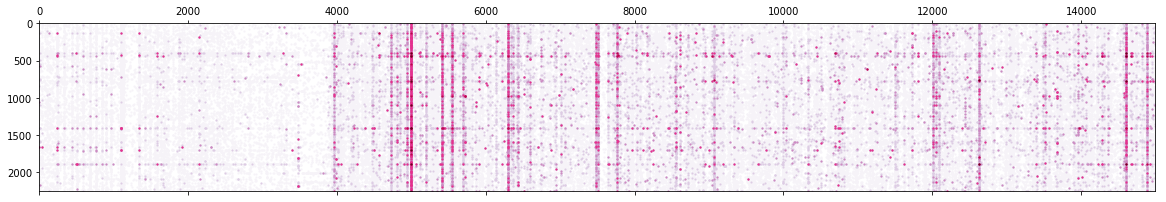

In [15]:
# heatmap-like visualization using matplotlib spy
precisions = [0, 2, 5, 10, 50, 100]
# color palette reference: cmap='PuRd'
colors = ['#F6F3F8', '#DDCCE4', '#CD8AC2', '#E6308E', '#B80B4E', '#67001F']

plt.subplots(figsize=(20, 25))

# plot first 15000 terms
for p, c in zip(precisions, colors):
    plt.spy(X_counts[:, :15000], precision=p, markersize=1, color=c)

plt.show()

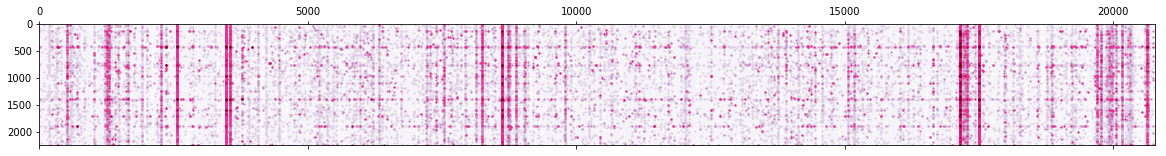

In [16]:
# plot the rest of 15000 terms
plt.subplots(figsize=(20, 25))
for p, c in zip(precisions, colors):
    plt.spy(X_counts[:, 15000:], precision=p, markersize=1, color=c)

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [17]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

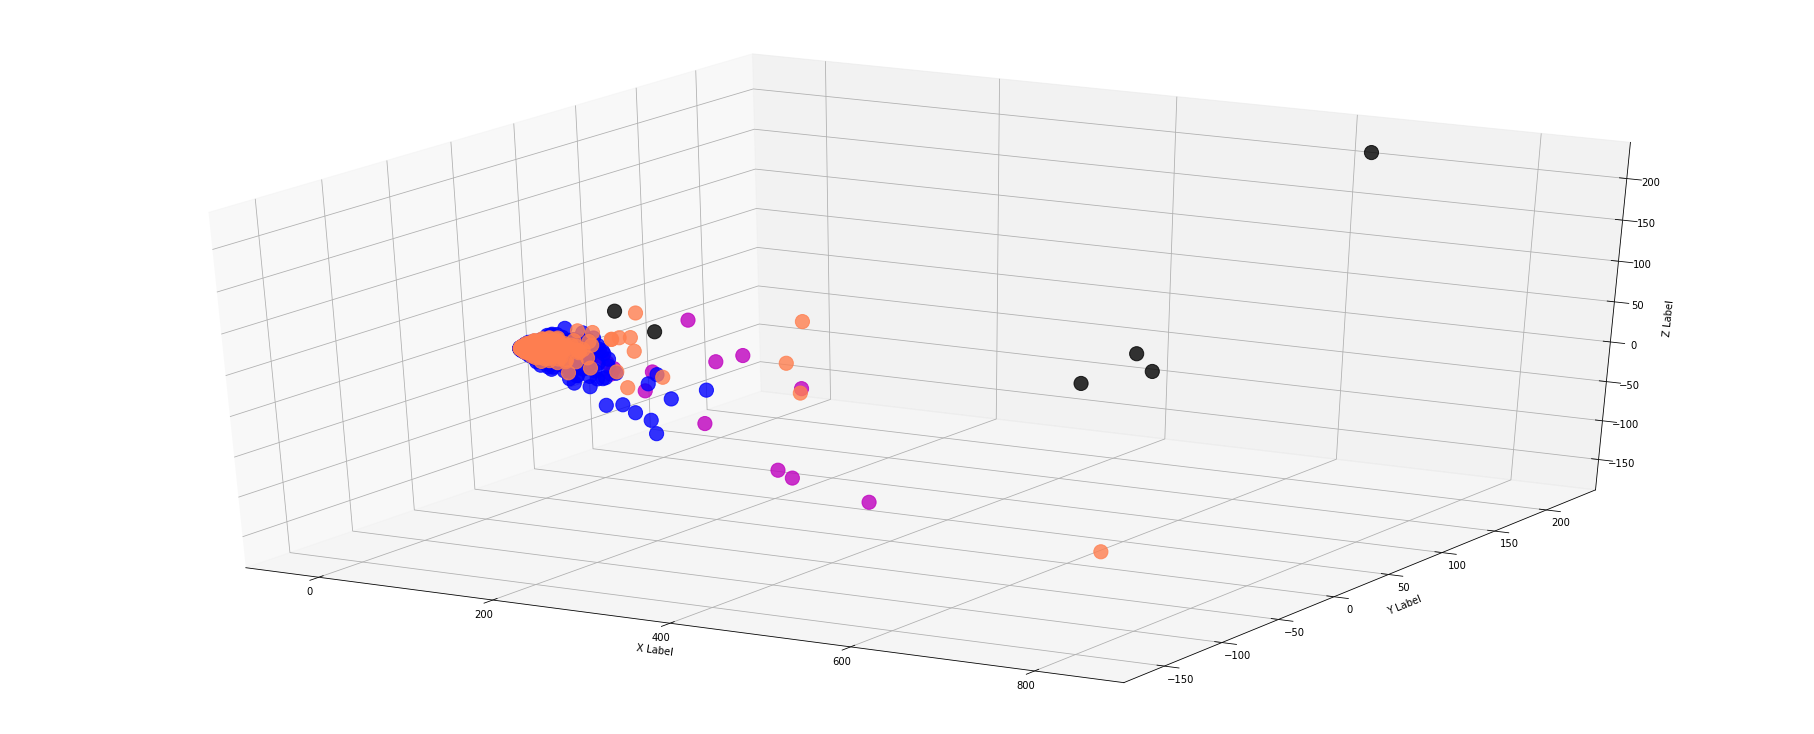

In [18]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs,c = c, marker='o',s=200, alpha=0.8)

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

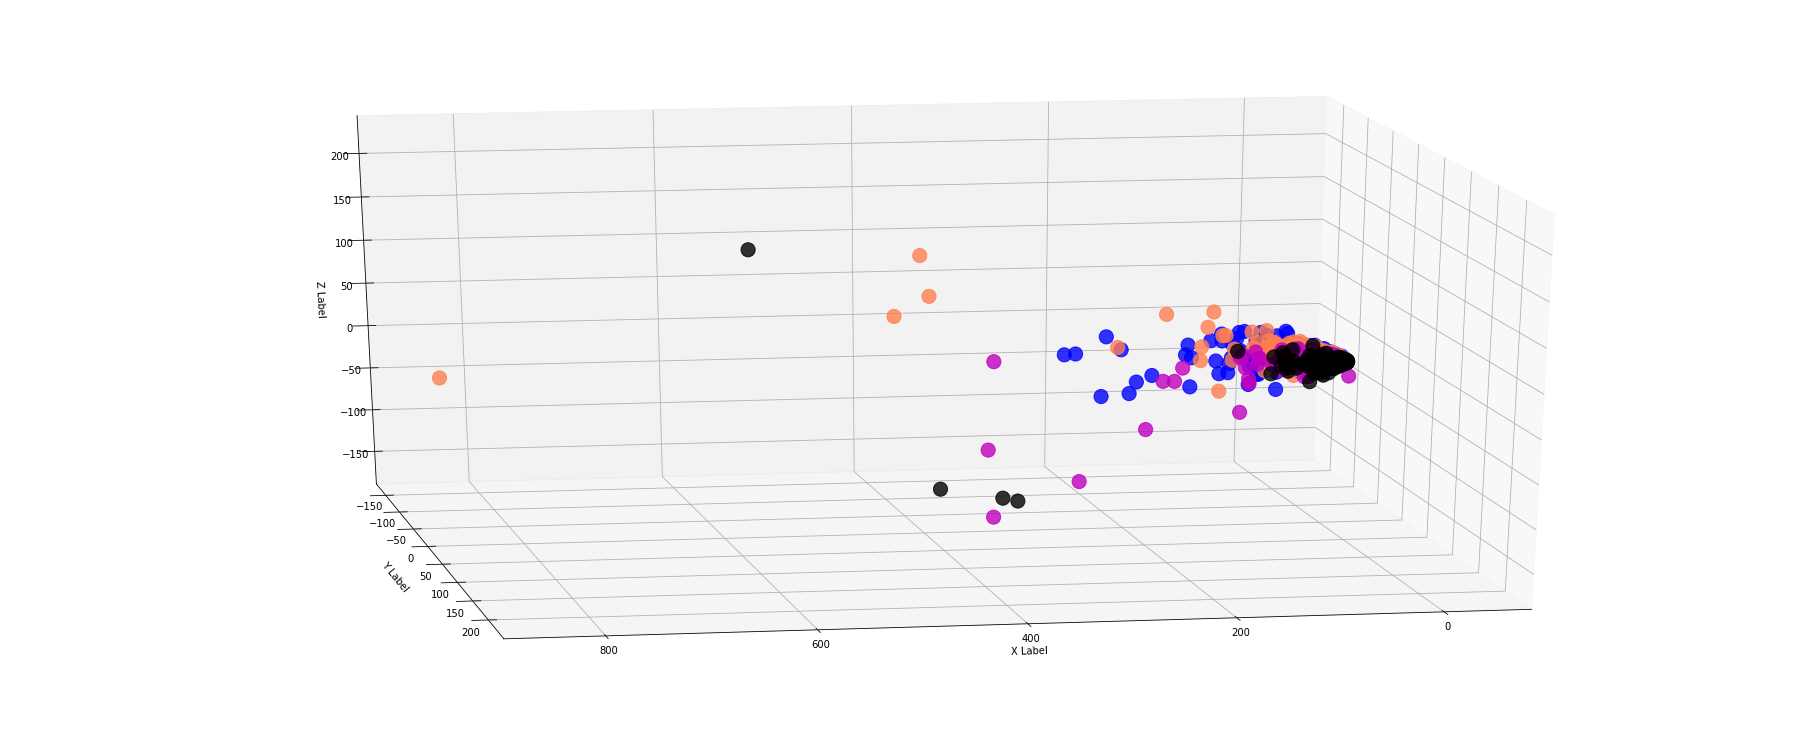

In [19]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs,c = c, marker='o',s=200, alpha=0.8)

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(20, 80)

plt.show()

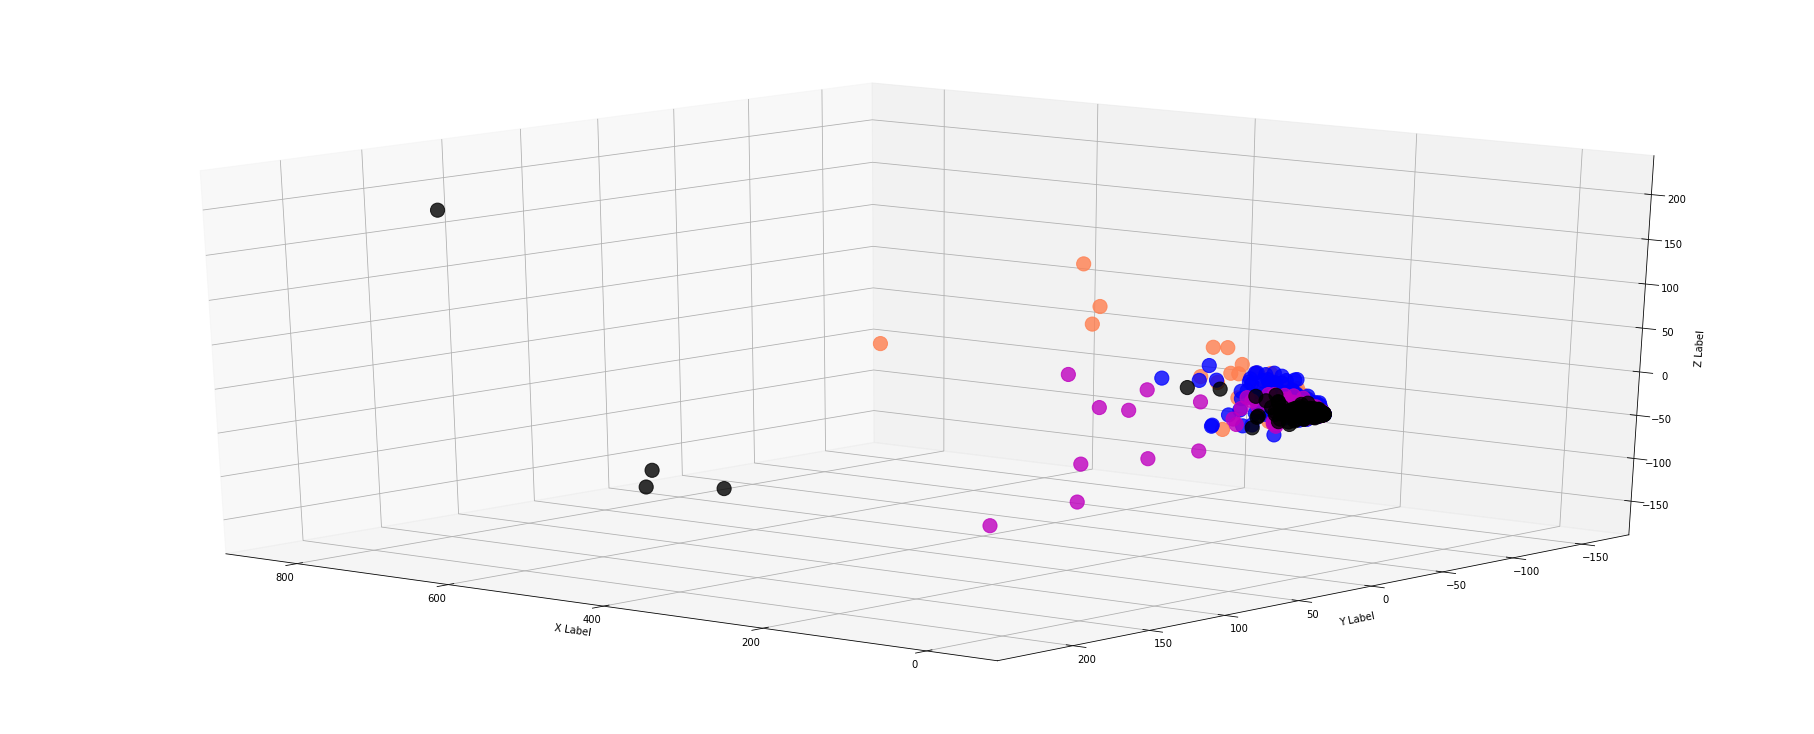

In [20]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs,c = c, marker='o',s=200, alpha=0.8)

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(20, 130)

plt.show()

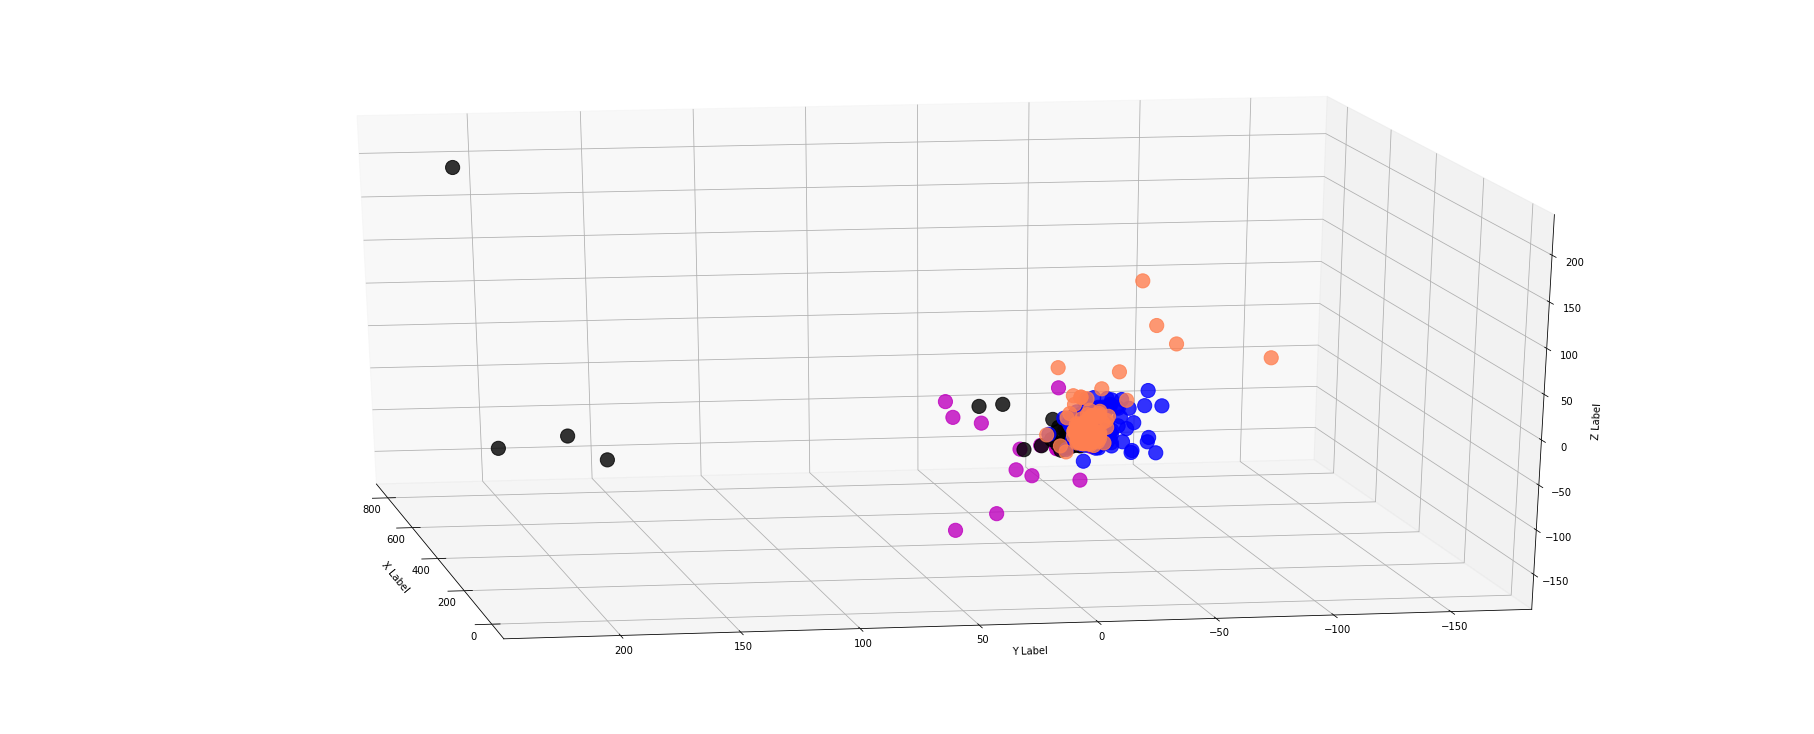

In [21]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs,c = c, marker='o',s=200, alpha=0.8)

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(20, 170)

plt.show()

**HW 12 Observations:
As the angle increases, we could see that the major part of the color(points) differs:
when the angle is 
original graph-Coral & Blue
80-Black & Blue,
130-Black & Magenta,
170-Coral & Blue.
When the graph tuns into 3D, we could see that in different angle there's a special grouping category for each, so it'll be better to dig into more detailed or specific dimension of data.

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [22]:
# using plotly_bar chart to generate the interactive visualization
term_frequencies = X_counts.toarray().sum(axis=0)
df_term_freq = pd.DataFrame({'freq': term_frequencies})

fig = px.bar(df_term_freq[:500], y='freq')
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [23]:
#By setting a threshold(limits) on 'freq' from 100 to 400,
#we could reduce the number of terms we want to analyze more efficiently by 'eyes'.
df_term_freq = pd.DataFrame({'freq': term_frequencies})

fig = px.bar(df_term_freq[:500], y='freq')
fig.update_layout(yaxis=dict(range=[100,400]))
fig.show()

In [24]:
#By setting a threshold(limits) on 'freq' from 100 to 400,
#we could reduce the number of terms we want to analyze more efficiently by 'data'.
term_frequencies = X_counts.toarray().sum(axis=0)
lim = 100
term_eff_frequencies = term_frequencies[term_frequencies > lim]

print(term_eff_frequencies)

[  134   378   105   215   236   219   239   293   278   192   184   208
   488   324   192   142   136   268   116   123   101   167   104   101
   210   109   124   108   161   226  2148   248   137   303   183   130
   129   121   279   148   105   489   315   213   105   154   208   104
   147  2093   147   114   146  1090   147   164   252   852   199  2393
   113 13017   145   105   403   251   104   121  1669   131   557   366
   127   106   335   123  4769   112   106   287   104   246  1453  4015
   232   126   138  2191   326   214   387   171   257   146   339   199
   347   213   275   286   116  4898   952   170  1068   420   719   255
   156   803   131   289   344   322   541   101   128   119   327   110
   154   251   362   172   403   109   101  3453  2548   492   151   194
   294   255   142  2818   103   155   122   313   148   372   125   174
   262   103   278   105   235   203   228   161   120   102   170   103
   390   546   289   495   472   274   127   182   

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

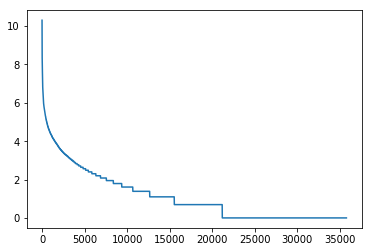

In [25]:
#As we learned in the LAB1, let's see if it's better to use log distribution.
N = X_counts.shape[1]
index = np.arange(N)
term_frequencies_log = [math.log(i) for i in term_frequencies]
term_frequencies_log_des = np.sort(term_frequencies_log)[::-1]

plt.plot(index, term_frequencies_log_des[:N])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

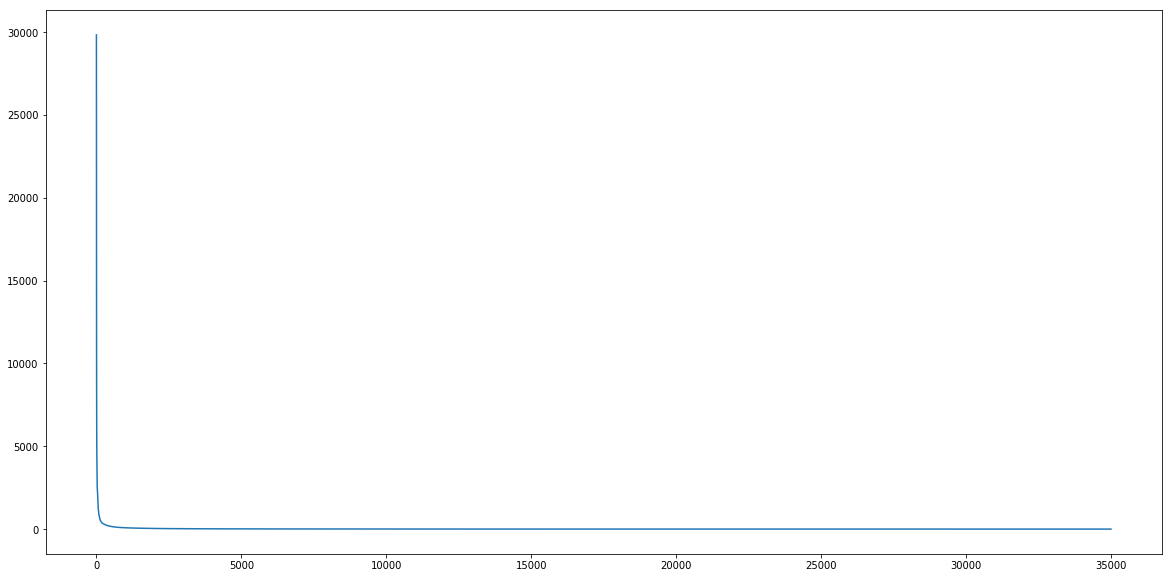

In [26]:
#Here we got the normal long tail gragh.
plt.figure(figsize=(20,10))
index = np.arange(35000)
descending_order = np.sort(term_frequencies)[::-1]

plt.plot(index, descending_order[:35000])
plt.show

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

**YES, it WORKS!(See below)

In [27]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
mlb.classes_

array(['alt.atheism', 'comp.graphics', 'sci.med',
       'soc.religion.christian'], dtype='<U22')

In [28]:
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[:30]

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4   From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
12  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13  Subject: So what is Maddi? From: madhaus@netco...         0   
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
17  Organization: Penn State University From: <JSN...         0   
18  From: tom_milligan@rainbow.mentorg.com Subject...         3   
19  Subject: Re: Don't more innocents die without ...         0   
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3   
21  From: gmiller@worldbank.org (Gene C. Miller) S...         0   
22  From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
23  From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...         1   
24  From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...         1   
25  From: dstampe@psych.toronto.edu (Dave Stampe) ...         1   
26  From: christian@geneva.rutgers.edu Subject: en...         3   
27  From: ruthless@panix.com (Ruth Ditucci) Subjec...         3   
28  From: rind@enterprise.bih.harvard.edu (David R...         2   
29  From: spp@zabriskie.berkeley.edu (Steve Pope) ...         2   

             category_name  bin_category  
0            comp.graphics  [0, 1, 0, 0]  
1            comp.graphics  [0, 1, 0, 0]  
2   soc.religion.christian  [0, 0, 0, 1]  
3   soc.religion.christian  [0, 0, 0, 1]  
4   soc.religion.christian  [0, 0, 0, 1]  
5   soc.religion.christian  [0, 0, 0, 1]  
6   soc.religion.christian  [0, 0, 0, 1]  
7                  sci.med  [0, 0, 1, 0]  
8                  sci.med  [0, 0, 1, 0]  
9                  sci.med  [0, 0, 1, 0]  
10  soc.religion.christian  [0, 0, 0, 1]  
11           comp.graphics  [0, 1, 0, 0]  
12             alt.atheism  [1, 0, 0, 0]  
13             alt.atheism  [1, 0, 0, 0]  
14           comp.graphics  [0, 1, 0, 0]  
15           comp.graphics  [0, 1, 0, 0]  
16                 sci.med  [0, 0, 1, 0]  
17             alt.atheism  [1, 0, 0, 0]  
18  soc.religion.christian  [0, 0, 0, 1]  
19             alt.atheism  [1, 0, 0, 0]  
20  soc.religion.christian  [0, 0, 0, 1]  
21             alt.atheism  [1, 0, 0, 0]  
22  soc.religion.christian  [0, 0, 0, 1]  
23           comp.graphics  [0, 1, 0, 0]  
24           comp.graphics  [0, 1, 0, 0]  
25           comp.graphics  [0, 1, 0, 0]  
26  soc.religion.christian  [0, 0, 0, 1]  
27  soc.religion.christian  [0, 0, 0, 1]  
28                 sci.med  [0, 0, 1, 0]  
29                 sci.med  [0, 0, 1, 0]

# Part2_Exercises of New Dataset


**->Loading the txt data and put it into arrays.**

In [29]:
import os
import re
import string
import helpers.data_mining_helpers as dmh
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [30]:
# This part is for the "Data Preperation."
# set empty arrays for our text files 
arr_imdb = []
arr_yelp = []
arr_amazon = []
arr_total = []

# read the txt files and then put them into [x,y] sets.
for inputline in open("imdb_labelled.txt", "r",encoding="utf-8"):
    x, y = inputline.strip().split('\t')
    arr_imdb.append( [x.strip(), y.strip(), 'imdb'] )
for inputline in open("amazon_cells_labelled.txt", "r",encoding="utf-8"):
    x, y = inputline.strip().split('\t')
    arr_amazon.append( [x.strip(), y.strip(), 'amazon'] )
for inputline in open("yelp_labelled.txt", "r",encoding="utf-8"):
    x, y = inputline.strip().split('\t')
    arr_yelp.append( [x.strip(), y.strip(), 'yelp'] )
    
# add the arrays up to form our complete dataset.
arr_total = arr_imdb + arr_yelp + arr_amazon

arr_total[0:10]

[['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.',
  '0',
  'imdb'],
 ['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.',
  '0',
  'imdb'],
 ['Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.',
  '0',
  'imdb'],
 ['Very little music or anything to speak of.', '0', 'imdb'],
 ['The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.',
  '1',
  'imdb'],
 ["The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",
  '0',
  'imdb'],
 ['Wasted two hours.', '0', 'imdb'],
 ['Saw the movie today and thought it was a good effort, good messages for kids.',
  '1',
  'imdb'],
 ['A bit predictable.', '0', 'imdb'],
 ['Loved the casting of Jimmy Buffet as the science teac

**->Make the arrays into dataframe.**

In [31]:
# This part is for the "Data Transformation."

#Create the Dataframe from our list above.
df_total = pd.DataFrame(arr_total,columns=['Sentence','Score','Source'])
df_total.head()

Sentence Score Source
0  A very, very, very slow-moving, aimless movie ...     0   imdb
1  Not sure who was more lost - the flat characte...     0   imdb
2  Attempting artiness with black & white and cle...     0   imdb
3         Very little music or anything to speak of.     0   imdb
4  The best scene in the movie was when Gerardo i...     1   imdb

In [32]:
# Check the completiness of our dataframe by len
len(df_total)

3000

**->To try out the iloc & loc techniques.**

In [33]:
# Try out the "iloc & loc" in the dataframe.

df_total.loc[lambda t: t.Source == 'amazon'].iloc[0:5]

Sentence Score  Source
2000  So there is no way for me to plug it in here i...     0  amazon
2001                        Good case, Excellent value.     1  amazon
2002                             Great for the jawbone.     1  amazon
2003  Tied to charger for conversations lasting more...     0  amazon
2004                                  The mic is great.     1  amazon

**->Try out the 'missing values' process by helpers in dmh.**

In [34]:
# Check if there's somethings missing in the values by helpers in dmh
df_total.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
Source      (The amoung of missing records is: , 0)
dtype: object

In [35]:
# Add a dummy data to test our missing values.
dummy_series = pd.Series(["dummy_record", 1], index=["Sentence", "Score"])
result_with_series = df_total.append(dummy_series, ignore_index=True)

In [36]:
# Check if there's somethings missing in the values by helpers in dmh
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
Source      (The amoung of missing records is: , 1)
dtype: object

In [37]:
# Drop the data with missing value.
df_total.dropna(inplace=True)

In [38]:
# Check our data if there's still sth. missing.
df_total.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
Source      (The amoung of missing records is: , 0)
dtype: object

**->Try out the 'Duplicated' process.**

In [39]:
len(df_total)

3000

In [40]:
# Check the number of duplicated data in the dataframe.
sum(df_total.duplicated())

17

In [41]:
# To eliminate the duplicated data.
df_total.drop_duplicates(inplace=True)
len(df_total)

2983

**->Try out the 'Feature subset selection' process.**

In [42]:
count_vect2 = CountVectorizer()
df_total_counts = count_vect2.fit_transform(df_total.Sentence)
df_total_counts.shape

(2983, 5155)

In [43]:
count_vect2.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [44]:
df_total_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [45]:
plot_x = ["term_"+str(i) for i in count_vect2.get_feature_names()[0:20]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [46]:
plot_y = ["doc_"+ str(i) for i in list(df_total.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [47]:
plot_z = df_total_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

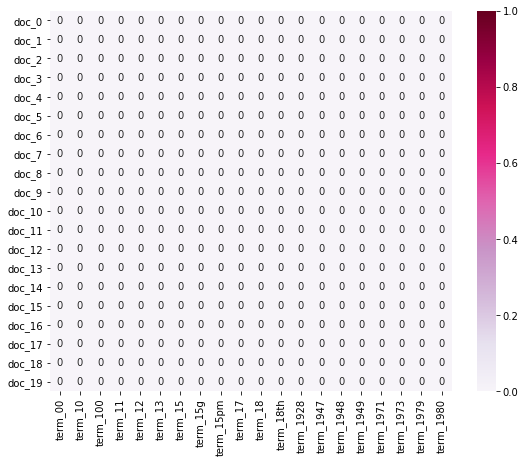

In [48]:
import seaborn as sns

df_todraw1 = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw1,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

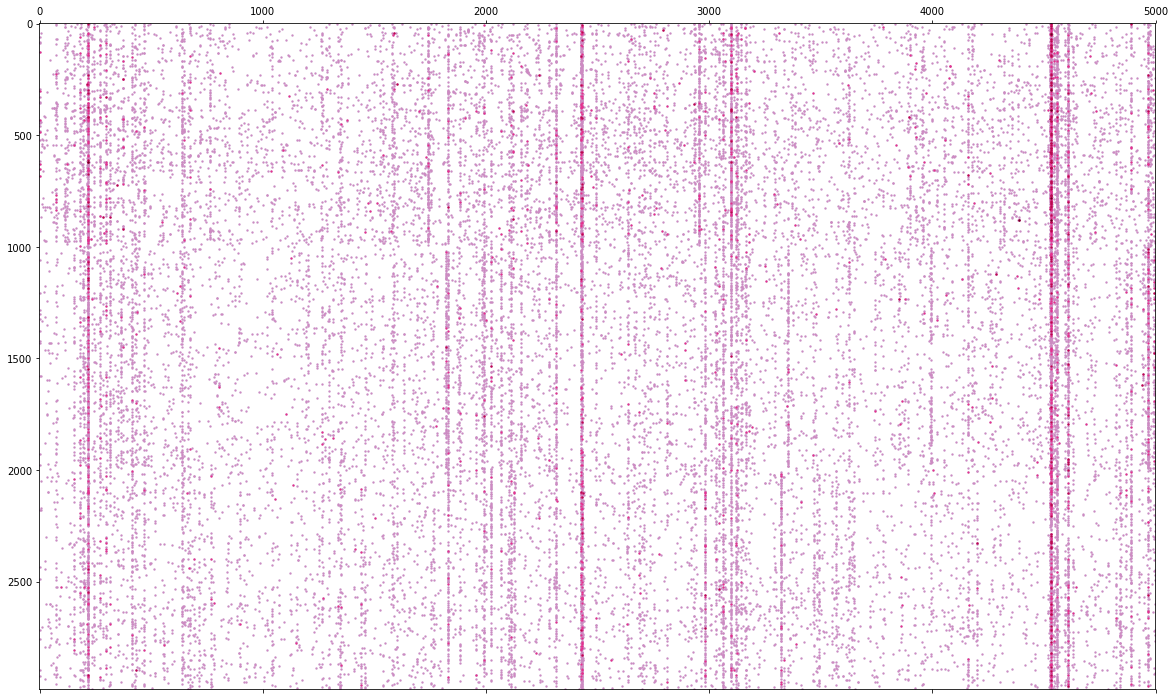

In [49]:
# heatmap-like visualization using matplotlib spy
precisions = [0, 0.2, 0.5, 1, 2, 5, 8, 10]
# color palette reference: cmap='PuRd'
colors = ['#F6F3F8', '#DDCCE4', '#CD8AC2', '#E6308E', '#B80B4E', '#67001F']

plt.subplots(figsize=(20, 25))

for p, c in zip(precisions, colors):
    plt.spy(df_total_counts[:, :5000], precision=p, markersize=1, color=c)

plt.show()

# Part3_Data visualizations and features on the new dataset.


**::Generate meaningful new data visualizations. 
Since the data is for positive and negative review, we could see for the positive and negative review, what's their main words or how about hte term frequencies in these words are like. Let's see what words are the mose popular ones in the negative reviews!**

In [50]:
# term frequency count in positive comments
pos_term_frequencies = df_total_counts[(df_total['Score'] == '1').values].toarray().sum(axis=0)
# term frequency count in negative comments
neg_term_frequencies = df_total_counts[(df_total['Score'] == '0').values].toarray().sum(axis=0)

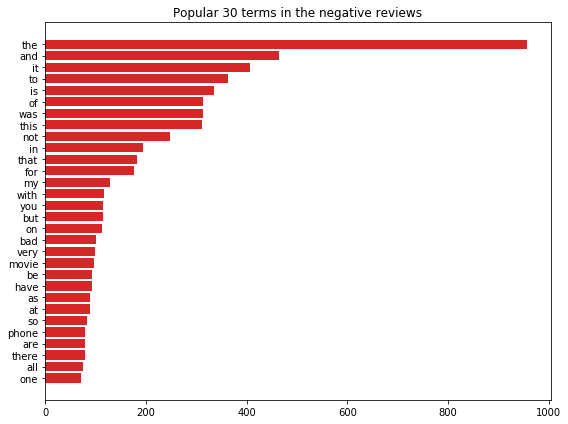

In [51]:
# plot the top 30 term with most appearance in negative comment.

N = 30
index = np.arange(N)

neg_30_term = []
for i in np.argsort(neg_term_frequencies)[::-1][:N]:
    neg_30_term.append(count_vect2.get_feature_names()[i])
y = np.sort(neg_term_frequencies)[::-1][:N]

fig = plt.figure(figsize=(8, 6))
ax = fig.subplots()

ax.set_title('Popular 30 terms in the negative reviews')
ax.barh(index, y, align='center', color='tab:red')
ax.set_yticks(index)
ax.set_yticklabels(neg_30_term)
ax.invert_yaxis()

fig.tight_layout()
plt.show()

**However, we could see that most of the popular 30 words in the negative reviews are meaningless to us(e.g. the, and, to, etc.) We could try to eliminate these words and to find the values(e.g. bad) in our negative comments&reviews.**

**::Generate TF-IDF features from the tokens of each text.**


In [52]:
# generate tfidf features
tfidf_vect_p2 = TfidfVectorizer()
df_tfidf = tfidf_vect_p2.fit_transform(df_total.Sentence)
df_tfidf.shape

(2983, 5155)

In [53]:
#print out the tfidf features' name
tfidf_vect_p2 = TfidfVectorizer()
df_tfidf = tfidf_vect_p2.fit_transform(df_total.Sentence)
dtt = df_tfidf.toarray()
d_tfidf = pd.DataFrame(dtt, columns = count_vect2.get_feature_names())
print(d_tfidf)

       00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
5     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
6     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
7     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
8     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
9     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
10    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
11    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    

**::Implement a simple Naive Bayes classifier.**

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [55]:
# Use term frequency features to build the classifiers.

x = df_total_counts
y = df_total['Score']
    
mnb = MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

cross_val_score(mnb, x, y, scoring='accuracy', cv=10).mean()

0.8209950393930552

In [56]:
# Use tfidf features to build classifiers.

x = df_tfidf
y = df_total['Score']
    
mnb = MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

cross_val_score(mnb, x, y, scoring='accuracy', cv=10).mean()

0.8236807254607079

**Comments of the differences**
Actually the classifiers are not that distinct, the number is quite similar and close to each other.

# Part4_How can you improve the Data preprocessing for these specific datasets?


**1- Graph creation - since in the class we use the heatmap as our graph, it's quite useful to see if the term exists in the features, but actually it took us quite a long time(1.35s for 50 samples) to create even just for 50 samples.**
**We could use the graph as in Homework-Part1-11, use the graph in take-home exercise 11 is more time efficient(only 0.96s for 15000 samples) and could see the whole situation better.**

1.6980018615722656


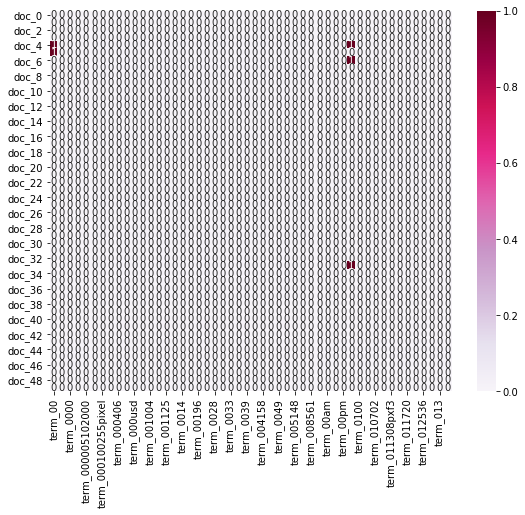

In [57]:
import time
start = time.time()
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]
plot_z = X_counts[0:50, 0:50].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
end = time.time()
elapsed = end - start
print(elapsed) 

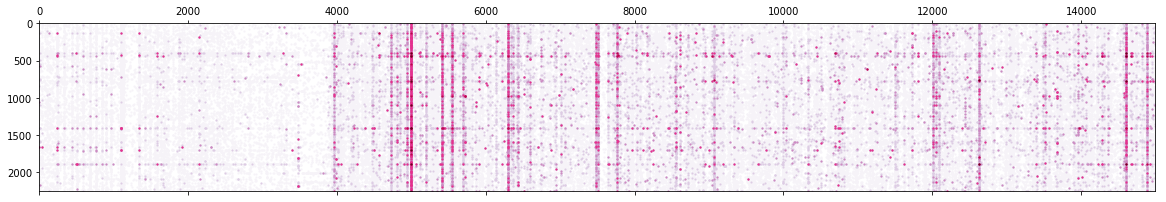

1.0029196739196777


In [58]:
start = time.time()
# heatmap-like visualization using matplotlib spy
precisions = [0, 2, 5, 10, 50, 100]
# color palette reference: cmap='PuRd'
colors = ['#F6F3F8', '#DDCCE4', '#CD8AC2', '#E6308E', '#B80B4E', '#67001F']

plt.subplots(figsize=(20, 25))

# plot first 15000 terms
for p, c in zip(precisions, colors):
    plt.spy(X_counts[:, :15000], precision=p, markersize=1, color=c)

plt.show()
end = time.time()
elapsed = end - start
print(elapsed) 

**Also, at the "attribute transformation / aggregation" part, the graph is kind of long and hard to see our target. We could set a limit as a threshold to make our targets more obvious and eyes-friendly.**

**2- Using Log data we could consider our data clearer.
Since the data is huge, using log as our function could help us defferenciate the trend or flow of data. See as below.

<function matplotlib.pyplot.show(*args, **kw)>

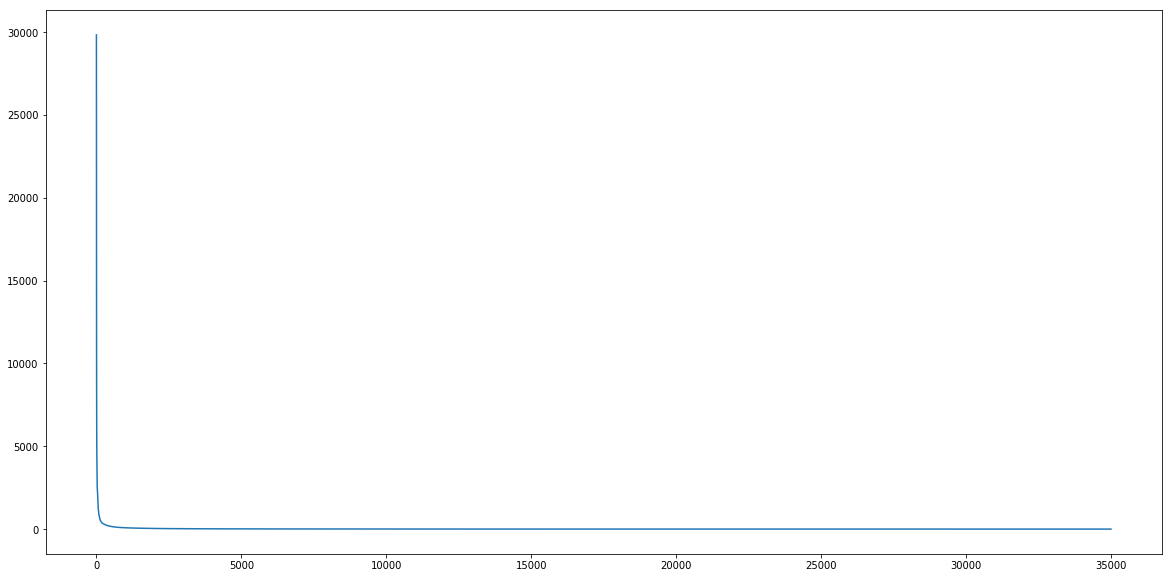

In [59]:
#Here we got the normal long tail gragh.
plt.figure(figsize=(20,10))
index = np.arange(35000)
descending_order = np.sort(term_frequencies)[::-1]

plt.plot(index, descending_order[:35000])
plt.show

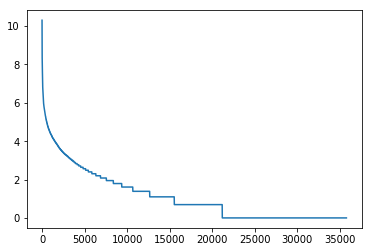

In [60]:
#As we learned in the LAB1, let's see if it's better to use log distribution.
N = X_counts.shape[1]
index = np.arange(N)
term_frequencies_log = [math.log(i) for i in term_frequencies]
term_frequencies_log_des = np.sort(term_frequencies_log)[::-1]

plt.plot(index, term_frequencies_log_des[:N])
plt.show()

**3-When reading new dataset, the txt files and then put them into [x,y] sets, I use the following method to put the txt data into array:**
#for inputline in open("imdb_labelled.txt", "r",encoding="utf-8"):
    x, y = inputline.strip().split('\t')
    arr_imdb.append( [x.strip(), y.strip(), 'imdb'] )#

**The efficiency may be enhanced if I use the '.toarray()' method, rather then using 'for' function.** 